In [1]:
%load_ext autoreload
%autoreload 2

# import src.ksd.models as models
# from src.ksd.find_modes import find_modes, pairwise_directions, run_bfgs
# from src.ksd.langevin import RandomWalkMH, RandomWalkBarker
# import src.ksd.langevin as mcmc
# from src.ksd.ksd import KSD
# from src.ksd.kernel import IMQ
# from src.ksd.bootstrap import Bootstrap
# from src.ksd.find_modes import find_modes, pairwise_directions
from tqdm.notebook import tqdm, trange

# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import tensorflow_probability as tfp
# tfd = tfp.distributions
import matplotlib.pyplot as plt
import seaborn as sns

# import kgof.density as density
# import kgof.data as data

# MCMCKernel = RandomWalkMH # RandomWalkBarker 

# from src.kgof.ksdagg import ksdagg_wild

In [87]:
## visualise digits

# import torchvision.transforms.functional as TF
# plt.rcParams["savefig.bbox"] = 'tight'


# def show(imgs):
#     if not isinstance(imgs, list):
#         imgs = [imgs]
#     fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
#     for i, img in enumerate(imgs):
#         img = img.detach()
#         img = TF.to_pil_image(img)
#         axs[0, i].imshow(np.asarray(img))
#         axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

# def show_imgs(imgs, title=None, row_size=4):
#     # Form a grid of pictures (we use max. 8 columns)
#     num_imgs = imgs.shape[0] if isinstance(imgs, torch.Tensor) else len(imgs)
#     is_int = (
#         imgs.dtype == torch.int32
#         if isinstance(imgs, torch.Tensor)
#         else imgs[0].dtype == torch.int32
#     )
#     nrow = min(num_imgs, row_size)
#     ncol = int(math.ceil(num_imgs / nrow))
#     imgs = torchvision.utils.make_grid(
#         imgs, nrow=nrow, pad_value=128 if is_int else 0.5
#     )
#     np_imgs = imgs.cpu().numpy()
# #     np_imgs = np.transpose(np_imgs, (1, 2, 0))
#     # Plot the grid
#     plt.figure(figsize=(1.5 * nrow, 1.5 * ncol))
# #     plt.imshow(np.transpose(np_imgs, (1, 2, 0)), interpolation="nearest")

#     for i in range(num_imgs):
#         plt.subplot(nrow, ncol, i+1)
#         plt.imshow(np.reshape(np_imgs[i], (28, 28, -1)), interpolation="nearest")
#         plt.axis("off")
#     if title is not None:
#         plt.title(title)
#     plt.show()


In [22]:
from src.nf import NF, NFReal, sample_NF_grad_NF, load_model, show_imgs
from src.ksd.models import generate_nf_mnist

In [3]:
nf_model = NF()

Found pretrained model, loading...


In [4]:
xx = nf_model.sample(12, seed=1)
# xx

2022-04-11 22:26:26.519009: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-11 22:26:26.519053: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: nvidia4
2022-04-11 22:26:26.519058: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: nvidia4
2022-04-11 22:26:26.519185: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.27.4
2022-04-11 22:26:26.519205: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.27.4
2022-04-11 22:26:26.519210: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.27.4
2022-04-11 22:26:26.519643: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in pe

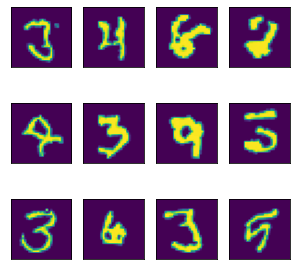

In [5]:
show_imgs(xx, row_size=3)

In [6]:
print(nf_model.log_prob(xx, seed=1))
print(nf_model.grad_log(xx, seed=1))

tf.Tensor(
[-648.4074  -616.4219  -786.746   -641.63464 -677.5775  -622.9312
 -612.8586  -757.8976  -775.2853  -525.9818  -705.30444 -688.1976 ], shape=(12,), dtype=float32)
tf.Tensor(
[[-22.43654   -40.336323  -27.839716  ... -24.1866    -27.904528
   -6.9245486]
 [ 22.073946   -1.7702435  72.15612   ... -15.198668  -28.596891
    4.969977 ]
 [-17.694843  -36.61451   281.1285    ...   5.11699   -25.588041
  358.39352  ]
 ...
 [-16.010483  -39.92734   -13.227149  ... -24.854536  -28.82482
   17.570711 ]
 [-15.305529  -30.061832  -19.32669   ...  34.86974   -11.333644
  -14.977648 ]
 [-26.68127   -48.10104   -14.194348  ...  21.77075   -23.543987
   36.960903 ]], shape=(12, 784), dtype=float32)


In [7]:
flow_model = load_model()

Found pretrained model, loading...


In [8]:
import pytorch_lightning as pl
import torch

xx_torch = torch.tensor(xx.numpy()).requires_grad_(True)
pl.seed_everything(1)
log_px = flow_model._get_likelihood(xx_torch.reshape(-1, 1, 28, 28), return_ll=True)
print(log_px)

log_px_sum = torch.sum(log_px)
log_px_sum.backward()
score = xx_torch.grad
print(score)

tensor([-648.4074, -616.4219, -786.7460, -641.6346, -677.5775, -622.9312,
        -612.8586, -757.8976, -775.2853, -525.9818, -705.3044, -688.1976],
       grad_fn=<AddBackward0>)
tensor([[-22.4365, -40.3363, -27.8397,  ..., -24.1866, -27.9045,  -6.9245],
        [ 22.0739,  -1.7702,  72.1561,  ..., -15.1987, -28.5969,   4.9700],
        [-17.6948, -36.6145, 281.1285,  ...,   5.1170, -25.5880, 358.3935],
        ...,
        [-16.0105, -39.9273, -13.2271,  ..., -24.8545, -28.8248,  17.5707],
        [-15.3055, -30.0618, -19.3267,  ...,  34.8697, -11.3336, -14.9776],
        [-26.6813, -48.1010, -14.1943,  ...,  21.7708, -23.5440,  36.9609]])


In [15]:
nf_model = generate_nf_mnist(real_mnist=False)
nf_mnist = generate_nf_mnist(real_mnist=True)

Found pretrained model, loading...
Found pretrained model, loading...


In [16]:
xx_real = nf_mnist.sample(12, seed=1)
# show_imgs(xx_real, row_size=3)

In [61]:
import tensorflow as tf
tf.reduce_max(xx)

<tf.Tensor: shape=(), dtype=float32, numpy=255.0>

# Use ONNX to load pytorch model to TF (grad no longer computable!)

In [12]:
import torch

input_names = ["input"]
output_names = ["output"]
dummy_input = xx.reshape(-1, 1, 28, 28)
ONNX_MODEL_PATH = "./nf.onnx"

# torch.onnx.export(
#     flow_model, dummy_input, ONNX_MODEL_PATH, verbose=True, input_names=input_names, output_names=output_names)

In [13]:
import onnx
from onnx_tf.backend import prepare

nf_model_tf = onnx.load(ONNX_MODEL_PATH) # Load the ONNX file
tf_rep = prepare(nf_model_tf) # Import the ONNX model to Tensorflow

2022-04-11 17:38:02.054645: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-11 17:38:02.494352: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8702 MB memory:  -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:da:00.0, compute capability: 7.5


In [27]:
import tensorflow as tf

dummy_input_tf = tf.constant(dummy_input.cpu().numpy())
tf_rep.run(dummy_input_tf)

Outputs(output=1.3472866)

In [33]:
import numpy as np
np.allclose(xx.cpu().reshape(-1, 1, 28, 28).numpy(), dummy_input_tf.numpy())

True

In [42]:
with tf.GradientTape() as g:
    g.watch(dummy_input_tf)
    logp = tf_rep.run(dummy_input_tf)

score = g.gradient(logp, dummy_input_tf)
score

AttributeError: 'numpy.float32' object has no attribute '_id'

In [36]:
score